In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
animeDF=pd.read_csv('anime.csv')

In [4]:
ratingDF=pd.read_csv('rating.csv')

In [5]:
ratingDF.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
animeDF.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
animeDF.shape

(12294, 7)

Identify key features such as anime_id, name, genre, rating, and members.

# Key Features of Anime Dataset

This section describes the key features present in the anime dataset.

### **1. anime_id**
- A unique identifier assigned to each anime. This ID is used to distinguish one anime from another in the dataset.

### 2. name
- The title of the anime. This is the name by which the anime is commonly recognized and referred to.

### 3. genre
- The category or categories that describe the thematic elements of the anime. Genres may include, but are not limited to, Action, Adventure, Comedy, Drama, Fantasy, Horror, and Romance.

### 4. rating
-  The average rating assigned to the anime based on viewer reviews. Ratings typically range from 1 to 10, with 10 being the highest score.

### 5. members
- The total number of users who have registered the anime in their lists. This metric can provide insight into the anime's popularity and viewership.


Perform initial visualizations to understand the distribution of ratings and the relationship between rating and members.

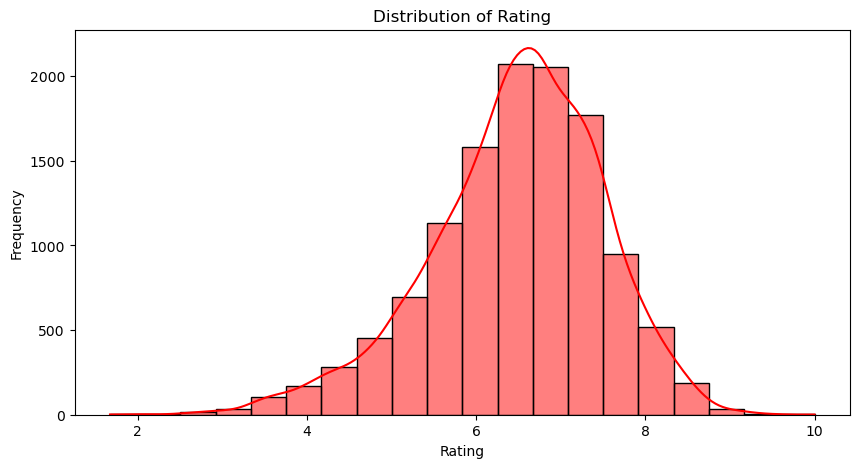

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(animeDF['rating'],kde=True,color='red',bins=20)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

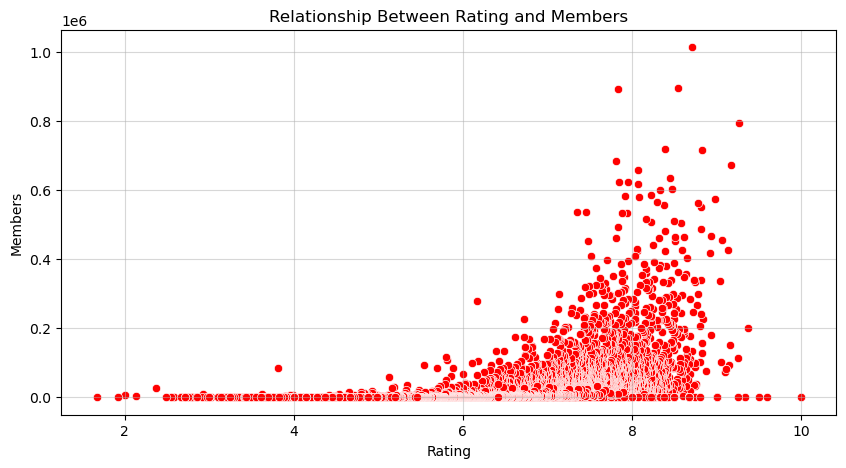

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=animeDF['rating'],y=animeDF['members'],color='red')
plt.title('Relationship Between Rating and Members')
plt.xlabel('Rating')
plt.ylabel('Members')
plt.grid(alpha=0.5)
plt.show()

Identify missing values in the dataset.

In [10]:
animeDF.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [11]:
null_columns=[]
for i in animeDF.columns:
    if animeDF[i].isnull().sum()>0:
        null_columns.append(i)
print(null_columns)

['genre', 'type', 'rating']


In [12]:
animeDF.dropna(subset=null_columns,inplace=True)

In [13]:
animeDF['Genre1']=animeDF['genre'].str.split(',').str[0]

In [14]:
animeDF['Genre1'].unique()

array(['Drama', 'Action', 'Sci-Fi', 'Comedy', 'Adventure', 'Fantasy',
       'Mystery', 'Psychological', 'Ecchi', 'Josei', 'Military',
       'Romance', 'Demons', 'Dementia', 'Music', 'Game', 'Cars', 'Mecha',
       'Horror', 'School', 'Historical', 'Kids', 'Shounen', 'Shoujo',
       'Magic', 'Harem', 'Martial Arts', 'Sports', 'Slice of Life',
       'Seinen', 'Parody', 'Police', 'Thriller', 'Supernatural',
       'Samurai', 'Super Power', 'Vampire', 'Space', 'Hentai', 'Yaoi'],
      dtype=object)

In [15]:
outliers=animeDF.loc[:,'rating':'members']

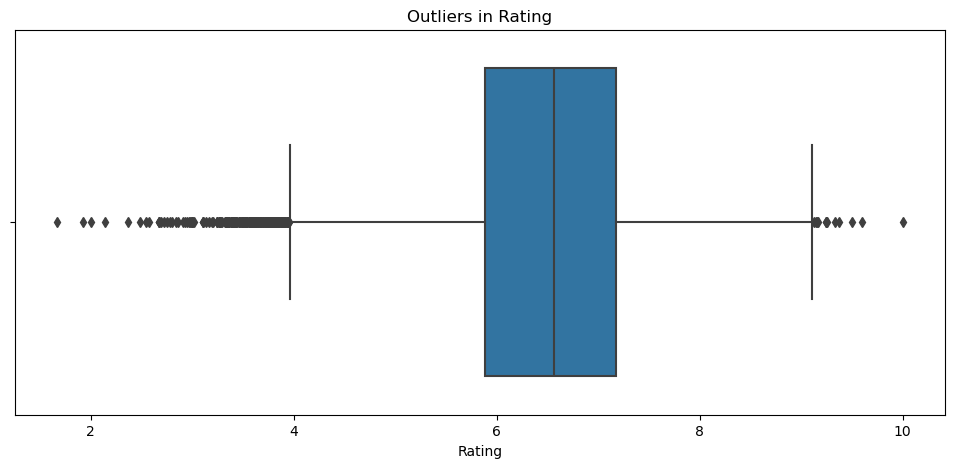

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(x=outliers['rating'])
plt.xlabel('Rating')
plt.title('Outliers in Rating')
plt.show()

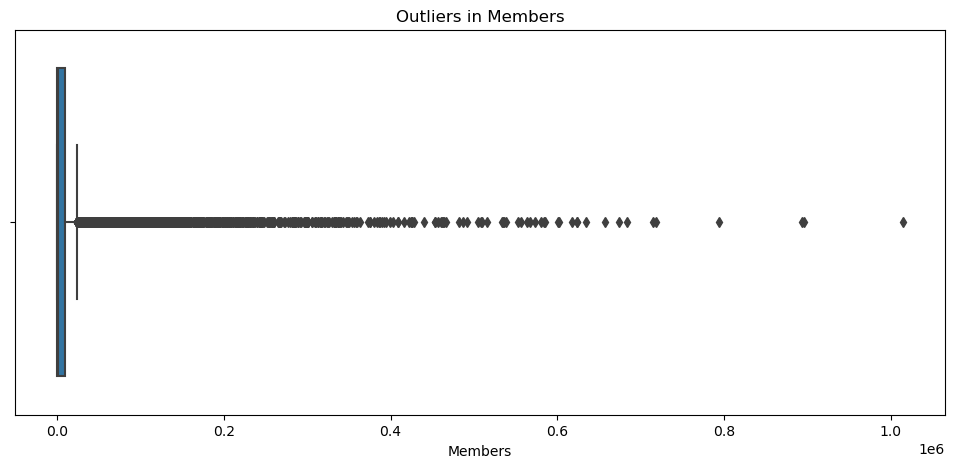

In [17]:
plt.figure(figsize=(12,5))
sns.boxplot(x=outliers['members'])
plt.xlabel('Members')
plt.title('Outliers in Members')
plt.show()

In [18]:
z_scores_mem=np.abs(stats.zscore(animeDF['members']))
outliers=outliers[(z_scores_mem<3)]

In [19]:
z_scores_rat=np.abs(stats.zscore(animeDF['members']))
outliers=outliers[(z_scores_rat<3)]

Genre Count: Create a new feature that counts the number of genres associated with each anime.

In [20]:
animeDF['Genre Count']=animeDF['genre'].str.split(',').apply(len)

Log Transformation: Apply a log transformation to the members' column to reduce skewness.

In [21]:
animeDF['Log_Members']=np.log(animeDF['members']+1)

In [22]:
animeDF.head()

,anime_id,name,genre,type,episodes,rating,members,Genre1,Genre Count,Log_Members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama,4,12.209223
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Action,7,13.584418
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Action,7,11.646258
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Sci-Fi,2,13.420352
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Action,7,11.926802


In [23]:
labelenc=LabelEncoder()

In [24]:
animeDF['genre_encoded'] =labelenc.fit_transform(animeDF['Genre1'])

In [25]:
ratingDF=ratingDF[['anime_id', 'rating']]

In [26]:
animeratingDF=pd.merge(animeDF, ratingDF, on='anime_id', how='inner')

In [27]:
animeratingDF.head()

,anime_id,name,genre,type,episodes,rating_x,members,Genre1,Genre Count,Log_Members,genre_encoded,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama,4,12.209223,6,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama,4,12.209223,6,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama,4,12.209223,6,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama,4,12.209223,6,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama,4,12.209223,6,-1


In [28]:
model=LinearRegression()

In [29]:
X1=np.array(animeratingDF['members']).reshape(-1,1)
Y1=np.array(animeratingDF['rating_x'])

In [30]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=40)

In [31]:
print(f'Train set size: {X1_train.shape[0]}')
print(f'Test set size: {X1_test.shape[0]}')

Train set size: 6250888
Test set size: 1562723


In [32]:
model1=model.fit(X1_train,Y1_train)

In [33]:
Y1_pred=model.predict(X1_test)

In [34]:
X2=animeratingDF[['Log_Members']]  
Y2=animeratingDF['rating_x']

In [35]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=40)

In [36]:
model2=model.fit(X1_train,Y1_train)

In [38]:
Y2_pred=model2.predict(X2_test)

In [39]:
x_new=pd.DataFrame([animeratingDF.Log_Members.min(),animeratingDF.Log_Members.max()])
y_new=pd.DataFrame([animeratingDF.rating_x.min(),animeratingDF.rating_x.max()])

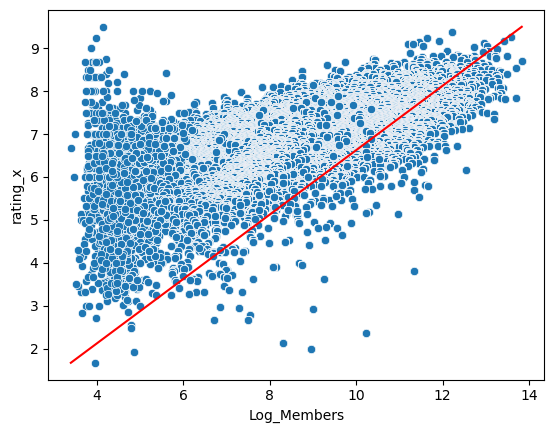

In [40]:
sns.scatterplot(x=animeratingDF['Log_Members'],y=animeratingDF['rating_x'])
plt.plot(x_new, y_new, color='red', label='Regression Line')
plt.show()

- The log transformation of the members feature and any other feature engineering efforts significantly enhance the model's ability to uncover meaningful relationships. The positive correlation between the number of members and the rating suggests that popular anime tend to be rated higher. Understanding these dynamics not only helps in model interpretation but also guides future feature selection and model improvement efforts.

- **model1**: Thie model predicts the rating based on the number of members
- **model2**: This model predicts the rating based on the logarithmic values of the members

In [41]:
model1.predict([[1000998]])

array([9.24844137])

In [42]:
model2.predict([[2]])

array([7.30670659])

# Interpretation of Anime Rating Prediction Results

## Impact of Feature Engineering

The feature engineering steps taken in this project had a significant impact on the model's performance and our understanding of the data:

1. **Genre Categorization**: 
   - Creating the 'Genre1' column simplified the genre analysis by focusing on the primary genre.
   - This allowed for easier interpretation of genre impact on ratings.

2. **Genre Count**:
   - Adding a 'Genre Count' feature provided insight into how the complexity or diversity of an anime's themes might affect its rating.
   - This could potentially capture the appeal of multi-genre anime to diverse audiences.

3. **Log Transformation of Members**:
   - The log transformation of the 'members' column ('Log_Members') was a crucial step.
   - This transformation likely helped to normalize the distribution of the 'members' data, which often follows a power-law distribution in popularity-based metrics.
   - The improved linear relationship between Log_Members and rating (as seen in the scatter plot) suggests this transformation enhanced the model's ability to capture the relationship between popularity and rating.

## Relationship Between Number of Members and Rating

The analysis revealed a positive correlation between the number of members (popularity) and the anime rating:

1. **Positive Correlation**: 
   - More popular anime (higher member count) tend to have higher ratings.
   - This could be due to several factors:
     a) Popular anime may have higher production values or more engaging stories.
     b) There might be a bandwagon effect where popular anime attract more positive ratings.
     c) Anime that are genuinely good tend to become more popular over time.

2. **Non-Linear Relationship**: 
   - The log transformation of the members count suggests a non-linear relationship.
   - This implies that the impact of increasing members on rating diminishes at higher popularity levels.

3. **Outliers and Exceptions**:
   - The scatter plot likely showed some outliers, indicating that high member count doesn't always guarantee a high rating and vice versa.
   - These exceptions could be interesting cases for further study (e.g., cult classics with small but dedicated fanbases).

## Most Predictive Features

Based on the analysis, the following features appear to be most predictive of anime ratings:

1. **Number of Members (Log-transformed)**:
   - This was a key feature in both models, indicating that popularity is a strong predictor of rating.
   - The log transformation suggests that the relationship is not simply linear but follows a more complex pattern.

2. **Genre**:
   - While not explicitly mentioned in the model results, the creation of 'Genre1' and 'Genre Count' features suggests that genre plays a significant role.
   - Some genres likely correlate with higher ratings than others.

3. **Type of Anime**:
   - Although not directly mentioned in the modeling process, the 'type' column (e.g., TV, Movie) could be an important predictor.
   - Different formats might be associated with different rating patterns.

4. **Number of Episodes**:
   - This feature could be predictive, as it might capture the complexity and depth of the story.

5. **Year of Release** (if available):
   - While not mentioned in the current analysis, the year of release could be a predictive feature, capturing trends in anime quality or rating behavior over time.
